In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
### BESS

df_bess = pd.read_pickle("bess_distribution.pkl")
df_bess

,Kapazitaetsklasse,Anzahl
0,0-1 kWh,1883
1,1-2 kWh,23631
2,2-3 kWh,20845
3,3-4 kWh,27773
4,4-5 kWh,49988
5,5-6 kWh,282113
6,6-7 kWh,76360
7,7-8 kWh,197083
8,8-9 kWh,91798
9,9-10 kWh,372744


In [3]:
df_bess["Anzahl"].sum()

1144218

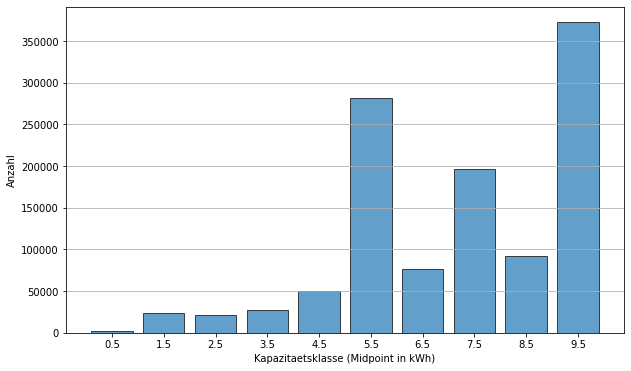

In [4]:
df_bess['Kapazitaetsklasse_int'] = df_bess['Kapazitaetsklasse'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1].split()[0])) / 2)

# Plot histogram with Kapazitaetsklasse_int on the x-axis and Anzahl on the y-axis
plt.figure(figsize=(10, 6))
plt.bar(df_bess['Kapazitaetsklasse_int'], df_bess['Anzahl'], width=0.8, edgecolor='black', alpha=0.7)
plt.xlabel('Kapazitaetsklasse (Midpoint in kWh)')
plt.ylabel('Anzahl')
plt.xticks(df_bess['Kapazitaetsklasse_int'])  # Set x-axis ticks to match the midpoints
plt.grid(axis='y')
plt.show()

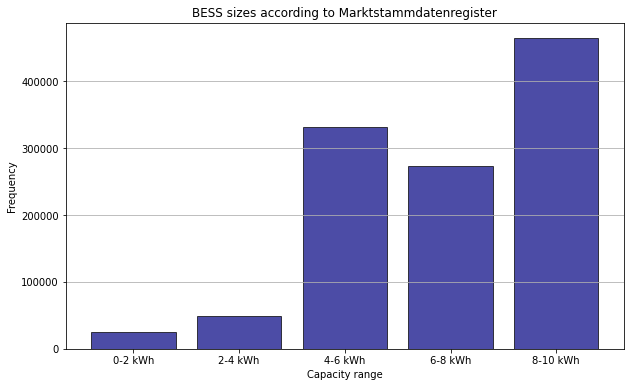

In [5]:
custom_bins_bess = [0, 2, 4, 6,8, 10]  # These bins correspond to desired ranges: 0-2, 2-4, 4-6, and 6-10 kWh

# Aggregate Anzahl values into 4 bins using the custom bins
df_bess['bin'] = pd.cut(df_bess['Kapazitaetsklasse_int'], bins=custom_bins_bess, labels=['0-2 kWh', '2-4 kWh', '4-6 kWh', '6-8 kWh','8-10 kWh'])

# Group by the bins and sum up the Anzahl values
df_bess_binned_custom = df_bess.groupby('bin').agg({'Anzahl': 'sum'}).reset_index()

# Plot the combined histogram with 4 bins based on custom ranges
plt.figure(figsize=(10, 6))
plt.bar(df_bess_binned_custom['bin'], df_bess_binned_custom['Anzahl'], width=0.8, color='navy', edgecolor='black', alpha=0.7)
plt.xlabel('Capacity range')
plt.ylabel('Frequency')
plt.title('BESS sizes according to Marktstammdatenregister')
plt.grid(axis='y')
plt.show()

In [6]:
df_bess_binned_custom["Anteil"] = df_bess_binned_custom["Anzahl"] / df_bess_binned_custom["Anzahl"].sum()
df_bess_binned_custom

,bin,Anzahl,Anteil
0,0-2 kWh,25514,0.022298
1,2-4 kWh,48618,0.042490
2,4-6 kWh,332101,0.290243
3,6-8 kWh,273443,0.238978
4,8-10 kWh,464542,0.405991


In [7]:
#### PV

### BESS

df_pv = pd.read_pickle("pv_distribution.pkl")
df_pv

,Leistungsklasse,Anzahl
0,0-1 kW,668011
1,1-2 kW,151836
2,2-3 kW,102131
3,3-4 kW,157128
4,4-5 kW,247108
5,5-6 kW,310681
6,6-7 kW,312275
7,7-8 kW,297173
8,8-9 kW,293085
9,9-10 kW,595459


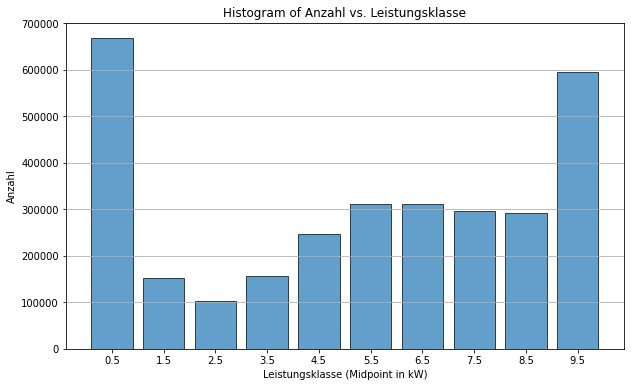

In [8]:
df_pv['Leistungsklasse_int'] = df_pv['Leistungsklasse'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1].split()[0])) / 2)

# Plot histogram with Leistungsklasse_int on the x-axis and Anzahl on the y-axis
plt.figure(figsize=(10, 6))
plt.bar(df_pv['Leistungsklasse_int'], df_pv['Anzahl'], width=0.8, edgecolor='black', alpha=0.7)
plt.xlabel('Leistungsklasse (Midpoint in kW)')
plt.ylabel('Anzahl')
plt.title('Histogram of Anzahl vs. Leistungsklasse')
plt.xticks(df_pv['Leistungsklasse_int'])  # Set x-axis ticks to match the midpoints
plt.grid(axis='y')
plt.show()

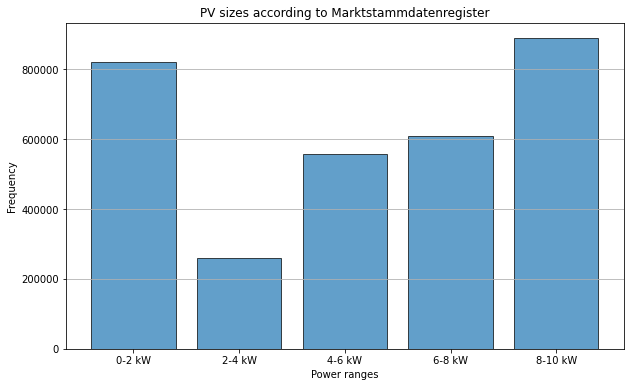

In [9]:
custom_bins = [0, 2, 4, 6,8, 10]  # These bins correspond to desired ranges: 0-2, 2-4, 4-6, and 6-10 kW

# Aggregate Anzahl values into 4 bins using the custom bins
df_pv['bin'] = pd.cut(df_pv['Leistungsklasse_int'], bins=custom_bins, labels=['0-2 kW', '2-4 kW', '4-6 kW', '6-8 kW', '8-10 kW'])

# Group by the bins and sum up the Anzahl values
df_pv_binned_custom = df_pv.groupby('bin').agg({'Anzahl': 'sum'}).reset_index()

# Plot the combined histogram with 4 bins based on custom ranges
plt.figure(figsize=(10, 6))
plt.bar(df_pv_binned_custom['bin'], df_pv_binned_custom['Anzahl'], width=0.8, edgecolor='black', alpha=0.7)
plt.xlabel('Power ranges')
plt.ylabel('Frequency')
plt.title('PV sizes according to Marktstammdatenregister')
plt.grid(axis='y')
plt.show()

In [10]:
df_pv_binned_custom["Anteil"] = df_pv_binned_custom["Anzahl"]/df_pv_binned_custom["Anzahl"].sum()

In [11]:
df_pv_binned_custom

,bin,Anzahl,Anteil
0,0-2 kW,819847,0.261524
1,2-4 kW,259259,0.082701
2,4-6 kW,557789,0.177930
3,6-8 kW,609448,0.194408
4,8-10 kW,888544,0.283437


In [12]:
df_pv["Anzahl"].sum()

3134887